# Exercise Set 6

Due: **9:30 16 May 2022**

Discussion: **13:00 20 May 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [7]:
import numpy as np
from math import sqrt
from scipy.stats import t
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. *Kepler* [60 points]

The [*Kepler* mission](https://keplerscience.arc.nasa.gov/science.html) was a planet-hunting mission from 2009-2018, during which time it observed thousands of stars to search for periodic variability.

 > **a)** *Kepler* observed 306604 stars in its lifetime, 3664 of which were identified as candidates for hosting a planet. In total, there were 9564 planet candidates (called Kepler Objects of Interest or KOI) including 4847 false positives. Assume that an object identified as a candidate by *Kepler* has a 50% chance of being a false positive if we account the relevant physics. Do the results from *Kepler* suggest that we accounted for all of the physics? What are the null and alternative hypotheses? Make the relevant plots, including the shaded regions of interest. **30 points**

**Null Hypothesis**, $H_0$ : All of the physics has been accounted for. i.e. Probability of false positives, p=0.5000

**Alternate Hypothesis**, $H_A$ : All of the physics has not been accounted for. i.e. Probability of false positives, p>0.5000 or p<0.5000

**Check for Conditions**

*1)*  Sampled objects are random and less than 10% of the objects in space.

*2)* np = 9564*0.5 = 4782 $>$ 10

Given observation (Proportion of false positives in 9564 candidates): 
$$ \bar{p} = 4847/9564 = 0.5068 $$
The observed values of this proportion are distributed as a Gaussian:
$$ \bar{p} \approx \mathcal{N} \bigg( mean = 0.5, SE = \sqrt{\dfrac{0.5\times 0.5}{9564}}  = 0.0051\bigg)$$
Z-score for the observed proportion:
$$ Z = \dfrac{0.5068-0.5000}{0.0051} = 1.33$$
Two-tailed p-value:
$$ p-value = \mathcal{P}(Z > 1.33) - \mathcal{P}(Z<-1.33) = ? $$

**Check for Conditions**

*1)*  Sampled objects are less than 10% of the objects in space.

*2)* np = 9564*0.5 = 4782 $\ge$ 10

Two tailed p-value for Z-score of 1.33 =  0.18351827130056153


Text(0.488217, 10, 'p=0.1835')

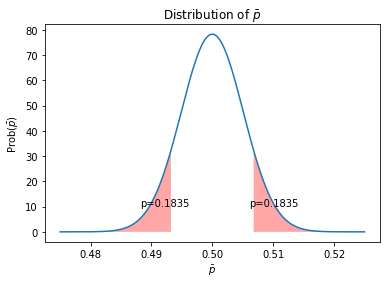

In [36]:
pval = 2*scipy.stats.norm.sf(abs(1.33))
print("Two tailed p-value for Z-score of 1.33 = ", pval)
x = np.arange(0.475, 0.525, 0.0001)
plt.title(r"Distribution of $\bar{p}$")
plt.xlabel(r'$\bar{p}$')
plt.ylabel(r"Prob($\bar{p}$)")
plt.plot(x, stats.norm.pdf(x, 0.5, 0.0051))
plt.fill_between(x=np.arange(0.5068,0.525,0.0001), y1 = stats.norm.pdf(np.arange(0.5068,0.525,0.0001),0.5,0.0051),facecolor ='red',alpha =0.35)
plt.fill_between(x=np.arange(0.475,0.5-(1.33*0.0051),0.0001), y1 = stats.norm.pdf(np.arange(0.475,0.5-(1.33*0.0051),0.0001),0.5,0.0051),facecolor ='red',alpha =0.35)
plt.text(x=0.506,y=10,s='p='+str(round(pval,4)))
plt.text(x=0.5-(1.33*0.0051)-0.005,y=10,s='p='+str(round(pval,4)))

$$ \text{Two-tailed } p-value = \mathcal{P}(Z > 1.33)- \mathcal{P}(Z<-1.33) \approx 0.18 $$

Since $ p-value > 0.05 $, we do not reject the null hypothesis. So, the results from Kepler does suggest that we accounted for all the relevant physics.

 > **b)** *Kepler* observed 8 planets within the habitable zone. Knowing that 6 of these planets orbit Sun-like stars while the others orbit red dwarfs, can you determine if a correlation must exist between stellar type and the occurance of an Earth-analogue planet? Show the simulation results. What is the probability of observing the planets we did? **30 points**

# 2. Small sample proportions [40 points]

There was a survey to determine if people were satisfied with their life, and it cross-referenced this with their income. The data is as follows:

| **GDP**     | less than €5000 | between €5000 and €50000 | more than €50000 |
| ----------: | ---------------: | -------------------------: | ----------------: |
| Satisfied   | 18               | 62                         | 6                 |
| Unsatisfied | 20               | 34                         | 3                 |

Use a $\chi^2$ test to determine if there is a correlation between income and general life satisfaction. Make the relevant plots. **40 points**